## Getting data

In [1]:
import os
import math
import random
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!unzip '/content/rose-tulip.zip' -d '/content/'

In [3]:
BASE_DIR = 'rose-tulip/'
names = ['ROSE', 'TULIP']

tf.random.set_seed(1)

In [4]:
# content -> rose-tulip -> Roses_single, Tulip_single, train, val

if not os.path.isdir(BASE_DIR + 'train/'):
    for name in names:
        os.makedirs(BASE_DIR + 'train/' + name)
        os.makedirs(BASE_DIR + 'val/' + name)

In [5]:
# move the image files
# content -> rose-tulip -> train -> ROSE, TULIP
# content -> rose-tulip -> val -> ROSE, TULIP

orig_folders = ['Roses_single/', 'Tulip_single/']
for folder_idx, folder in enumerate(orig_folders):
    files = os.listdir(BASE_DIR + folder)
    number_of_images = len([name for name in files])
    n_train = int(number_of_images * 0.8)
    n_valid = number_of_images - n_train
    print(number_of_images, n_train, n_valid)
    for idx, file in enumerate(files):
        file_name = BASE_DIR + folder + file
        if idx < n_train:
            shutil.move(file_name, BASE_DIR + "train/" + names[folder_idx])
        else:
            shutil.move(file_name, BASE_DIR + "val/" + names[folder_idx])

145 116 29
304 243 61


In [6]:
for dirpath, dirnames, filenames in os.walk(BASE_DIR):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 0 images in 'rose-tulip/'.
There are 2 directories and 0 images in 'rose-tulip/val'.
There are 0 directories and 61 images in 'rose-tulip/val/TULIP'.
There are 0 directories and 29 images in 'rose-tulip/val/ROSE'.
There are 2 directories and 0 images in 'rose-tulip/train'.
There are 0 directories and 243 images in 'rose-tulip/train/TULIP'.
There are 0 directories and 116 images in 'rose-tulip/train/ROSE'.
There are 0 directories and 0 images in 'rose-tulip/Tulip_single'.
There are 0 directories and 0 images in 'rose-tulip/Roses_single'.


In [6]:
import pathlib

data_dir = pathlib.Path('/content/rose-tulip/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['ROSE', 'TULIP'], dtype='<U5')

In [7]:
TRAIN_DIR = "/content/rose-tulip/train/"
VALID_DIR = "/content/rose-tulip/val/"

In [9]:
# view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (183, 275, 3)


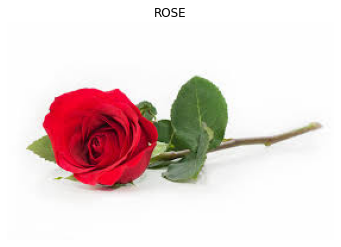

In [10]:
import random

img = view_random_image(target_dir=TRAIN_DIR,
                        target_class=random.choice(class_names))

Image shape: (194, 260, 3)


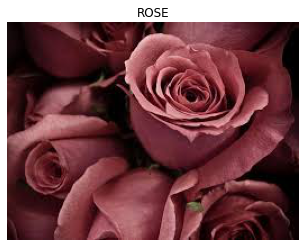

In [11]:
import random

img = view_random_image(target_dir=VALID_DIR,
                        target_class=random.choice(class_names))

## Compressing single image

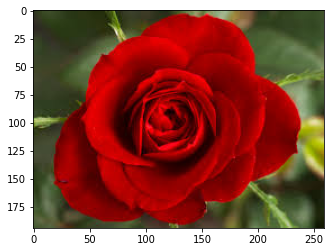

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os

sample_img = mpimg.imread('/content/rose-tulip/train/ROSE/rose100.jpg')

img = plt.imshow(sample_img)
plt.show()

In [24]:
sample_img

array([[[48, 53, 31],
        [48, 53, 31],
        [48, 56, 32],
        ...,
        [62, 80, 40],
        [62, 80, 40],
        [62, 80, 40]],

       [[47, 52, 32],
        [48, 53, 31],
        [48, 56, 32],
        ...,
        [62, 80, 40],
        [62, 80, 40],
        [62, 80, 40]],

       [[48, 51, 32],
        [48, 53, 33],
        [49, 54, 32],
        ...,
        [62, 80, 40],
        [62, 80, 40],
        [62, 80, 40]],

       ...,

       [[74, 95, 54],
        [74, 95, 54],
        [76, 94, 54],
        ...,
        [20, 25,  2],
        [20, 25,  2],
        [20, 25,  2]],

       [[65, 88, 46],
        [66, 89, 47],
        [67, 88, 47],
        ...,
        [19, 24,  1],
        [19, 24,  1],
        [19, 24,  1]],

       [[65, 88, 46],
        [66, 89, 47],
        [67, 88, 47],
        ...,
        [19, 24,  1],
        [19, 24,  1],
        [19, 24,  1]]], dtype=uint8)

In [25]:
sample_img.shape

(194, 259, 3)

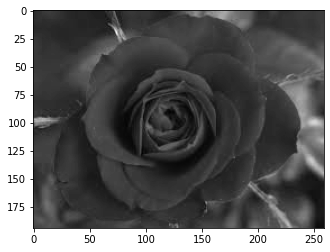

In [18]:
sample_img_bw = np.mean(sample_img, -1)         # RGB image to BW

img = plt.imshow(sample_img_bw)
img.set_cmap('gray')
plt.show()

In [19]:
sample_img_bw.shape

(194, 259)

In [20]:
U, S, Vt = np.linalg.svd(sample_img_bw, full_matrices=False)

In [21]:
U

array([[-0.07697804,  0.1191063 , -0.20268744, ..., -0.02004743,
        -0.01067065, -0.00447427],
       [-0.07663864,  0.11766513, -0.20313419, ...,  0.07367615,
         0.03384497,  0.05693193],
       [-0.07642516,  0.11733062, -0.20246619, ..., -0.05555823,
        -0.05104785, -0.12468911],
       ...,
       [-0.08176824,  0.08777852,  0.07621385, ..., -0.02247132,
        -0.02095551,  0.02772883],
       [-0.08176681,  0.0898538 ,  0.07711646, ...,  0.27332167,
         0.33583522,  0.06224335],
       [-0.08175055,  0.08981978,  0.0767648 , ..., -0.26913101,
        -0.314634  , -0.07193122]])

In [22]:
S

array([1.35927478e+04, 2.80731932e+03, 1.85726469e+03, 1.50279614e+03,
       1.38046099e+03, 1.23656869e+03, 1.05361182e+03, 8.50422068e+02,
       7.69690295e+02, 7.50256499e+02, 6.63480220e+02, 6.29348824e+02,
       5.89353663e+02, 5.44042272e+02, 5.03494883e+02, 4.68050953e+02,
       4.42132398e+02, 4.16629327e+02, 4.12343250e+02, 3.80350014e+02,
       3.60523230e+02, 3.41069396e+02, 3.14019714e+02, 3.06948302e+02,
       2.87903789e+02, 2.81209240e+02, 2.70475143e+02, 2.53028203e+02,
       2.42463921e+02, 2.36317363e+02, 2.24902694e+02, 2.19119750e+02,
       2.08884935e+02, 2.06585564e+02, 1.95842582e+02, 1.87643501e+02,
       1.78909225e+02, 1.75061371e+02, 1.67615483e+02, 1.60699032e+02,
       1.56584554e+02, 1.49385400e+02, 1.47479336e+02, 1.42125706e+02,
       1.40966787e+02, 1.37178086e+02, 1.34906107e+02, 1.28956382e+02,
       1.28002220e+02, 1.24511026e+02, 1.20699456e+02, 1.18277546e+02,
       1.16037024e+02, 1.12081083e+02, 1.11209367e+02, 1.08315984e+02,
      

In [23]:
Vt

array([[-0.06102466, -0.0606783 , -0.0611835 , ..., -0.08148652,
        -0.08089681, -0.08051208],
       [-0.03071289, -0.02978659, -0.03891262, ..., -0.14079319,
        -0.12952187, -0.12032687],
       [-0.00017812,  0.00140807, -0.00701047, ..., -0.12117513,
        -0.11379768, -0.10825689],
       ...,
       [ 0.03508013, -0.06646243,  0.07904913, ...,  0.06461205,
        -0.13653734,  0.0902214 ],
       [-0.09145733,  0.11193322, -0.01621723, ..., -0.11033341,
         0.03349505,  0.03510066],
       [-0.01537417,  0.05841256,  0.00470459, ..., -0.03950063,
         0.00650527, -0.00080932]])

In [24]:
U.shape, S.shape, Vt.shape

((194, 194), (194,), (194, 259))

In [25]:
# the previous output of S is a 1-D array of length n or 194 (in our case)
# it should become the diagonal of an empty matrix of size nxn in order to work with these matrix multiplication @ operators
# np.diag turns a vector into a matrix having array values only at diagonal

S = np.diag(S)
S

array([[1.35927478e+04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.80731932e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.85726469e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.85264034e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.57220597e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.40694170e+00]])

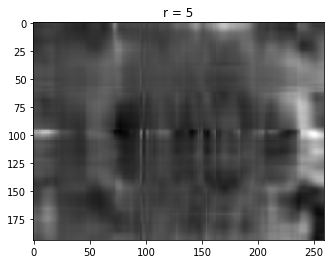

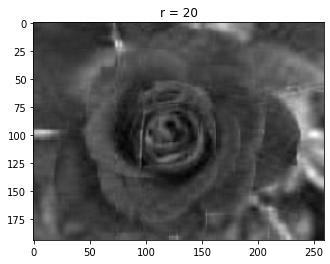

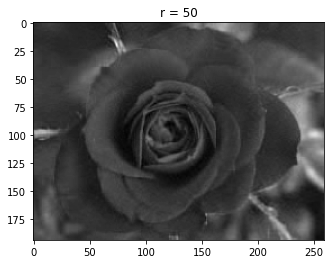

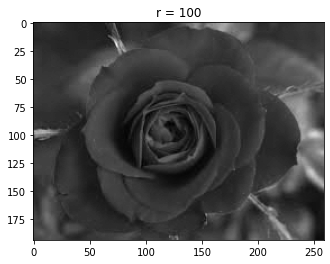

In [27]:
j = 0

for r in (5, 20, 50, 100):
    Xapprox = U[:, :r] @ S[:r, :r] @ Vt[:r, :]             # A @ B -> for matrix multiplication
    plt.figure(j+1)
    j+=1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.show()

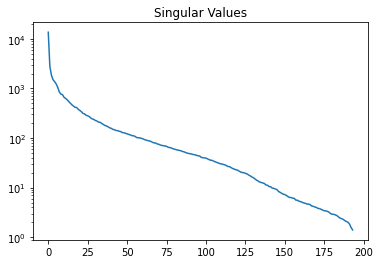

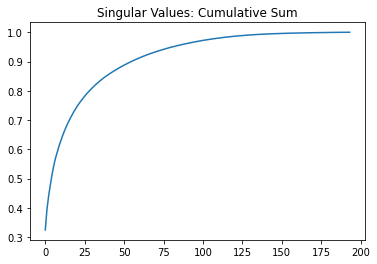

In [29]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

In 2nd plot, r=25 captures 80% of the energy.

In [30]:
Xapprox           # for r=100

array([[43.57971493, 44.00157225, 45.71404086, ..., 60.56099805,
        60.53043507, 60.15190827],
       [43.74307166, 43.91114167, 45.11214018, ..., 60.83864187,
        60.85061476, 61.11551737],
       [43.19320074, 43.81688814, 44.93907713, ..., 61.04030937,
        61.20144318, 61.42699461],
       ...,
       [75.12107588, 74.63889663, 74.32767777, ..., 15.7106749 ,
        15.97725466, 16.28559622],
       [66.49328685, 67.23693601, 67.35719206, ..., 14.40284549,
        14.52847116, 14.74964026],
       [66.19547481, 67.31299906, 67.34531274, ..., 14.40869811,
        14.68749524, 14.98568457]])

In [31]:
Xapprox.shape

(194, 259)

## Using r=30, for all images

In [8]:
ROSE_TRAIN_DIR = "/content/rose-tulip/train/ROSE/"
ROSE_VALID_DIR = "/content/rose-tulip/val/ROSE/"

TULIP_TRAIN_DIR = "/content/rose-tulip/train/TULIP/"
TULIP_VALID_DIR = "/content/rose-tulip/val/TULIP/"

In [41]:
import matplotlib.image as mpimg

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            img = np.mean(img, -1)
            U, S, Vt = np.linalg.svd(img, full_matrices=False)
            S = np.diag(S)
            Xapprox = U[:, :30] @ S[:30, :30] @ Vt[:30, :]
            images.append(img)
    return images

In [42]:
rose_train = load_images(ROSE_TRAIN_DIR)
rose_valid = load_images(ROSE_VALID_DIR)
tulip_train = load_images(TULIP_TRAIN_DIR)
tulip_valid = load_images(TULIP_VALID_DIR)

In [45]:
# count of images in each directory

len(rose_train), len(rose_valid), len(tulip_train), len(tulip_valid)  

(116, 29, 243, 61)

In [47]:
len(rose_train[0])      # width of 1st rose image

259

In [50]:
len(rose_train[0][1])   # length of 1st rose image

194

In [49]:
len(rose_train[0][0])   # length of 1st rose image

194

In [48]:
len(rose_train[1])      # width of 2nd rose image

225

In [51]:
len(rose_train[1][1])   # length of 2nd rose image

225

## Building dataset

In [16]:
!mkdir '/content/compressed/'

!mkdir '/content/compressed/train/'
!mkdir '/content/compressed/train/ROSE/'
!mkdir '/content/compressed/train/TULIP/'

!mkdir '/content/compressed/val/'
!mkdir '/content/compressed/val/ROSE/'
!mkdir '/content/compressed/val/TULIP/'

In [31]:
source_path1 = '/content/rose-tulip/train/ROSE/'
target_path1 = '/content/compressed/train/ROSE/'

In [32]:
source_path2 = '/content/rose-tulip/train/TULIP/'
target_path2 = '/content/compressed/train/TULIP/'

In [33]:
source_path3 = '/content/rose-tulip/val/ROSE/'
target_path3 = '/content/compressed/val/ROSE/'

In [34]:
source_path4 = '/content/rose-tulip/val/TULIP/'
target_path4 = '/content/compressed/val/TULIP/'

In [36]:
import matplotlib.image as mpimg
from PIL import Image

def compress_images(source_path, target_path):
    for filename in os.listdir(source_path):
        img = mpimg.imread(os.path.join(source_path, filename))
        if img is not None:
            img = np.mean(img, -1)
            U, S, Vt = np.linalg.svd(img, full_matrices=False)
            S = np.diag(S)
            Xapprox = U[:, :30] @ S[:30, :30] @ Vt[:30, :]
            result = Image.fromarray((Xapprox).astype(np.uint8))
            result.save(target_path+filename)

In [37]:
compress_images(source_path1, target_path1)

In [38]:
compress_images(source_path2, target_path2)

In [39]:
compress_images(source_path3, target_path3)

In [40]:
compress_images(source_path4, target_path4)